# Process, analyze, and summarize data with Spark and PySpark

## Project Description

Did you know that a billion records are processed daily in PySpark by companies worldwide? As big data is on the rise, you’ll need tools like PySpark to process massive amounts of data.

This guided project was designed to introduce data analysts and data science beginners to data analysis in PySpark. This 2-hour project course teaches you how to create a PySpark environment, explore and clean large data, aggregate and summarize data, and visualize data using real-life examples. By the end of this guided project, you’ll create a Jupyter Notebook that processes, analyzes, and summarizes data using PySpark. By working on hands-on tasks, you will gain a solid knowledge of data aggregation and summarization with PySpark, helping you acquire job-ready skills. 

You don’t need any experience in PySpark, but knowledge of Python is essential to succeeding in this project.

## Project Overview
This project demonstrates how to process and analyze large datasets using PySpark, focusing on employees data. Tasks include data loading, cleaning, exploration, and aggregation, culminating in insights on employee salaries and demographics.

### About the Dataset
**employees.csv**: Contains employee details like employee numbers, names, birth dates, hire dates, etc.

**updated_salaries.csv**: Contains salary details for each employee, including salary amounts and dates.

# Task One: Set up and overview of the project
In this task, you will get an overview of the project and set up the PySpark environment.

In [1]:
## Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg, max, min, countDistinct, sum, round

In [2]:
## Set up PySpark environment
from pyspark.sql import SparkSession

In [3]:
## Initialize the SparkSession
# appName is the name of the application
# getOrCreate() creates a new session or retrieves an existing one
spark = SparkSession.builder \
    .appName("PySpark Foundations Course") \
        .getOrCreate()

## Verify that SparkSession is created
spark

25/04/16 14:49:35 WARN Utils: Your hostname, Zipcoders-MacBook-Pro-5.local resolves to a loopback address: 127.0.0.1; using 192.168.3.155 instead (on interface en0)
25/04/16 14:49:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/16 14:49:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Task Two: Load the data
In this task, you will load the employees.csv and updated_salaries.csv data.

In [4]:
## Load the employees.csv dataset
# header=True means the first row is the header 
# inferSchema=True means Spark will try to infer the data types of the columns
try: # handle error if file not found    
    emp_df = spark.read.csv('./employees.csv', header=True, inferSchema=True) 
    print('Employee data loaded successfully')
except Exception as e:
    print(f'Error loading employee data: {e}')


Employee data loaded successfully


In [14]:
## Load the updated_salaries.csv dataset
try:
    sal_df = spark.read.format('csv') \
        .option('header', 'true')\
        .option('inferSchema', 'true') \
        .load('./updated_salaries.csv')
    print('Salary data loaded successfully')
except Exception as e:
    print(f'Error loading salary data: {e}')

Salary data loaded successfully


In [15]:
## Show the first few rows of the employees data
emp_df.show(5)

+------+----------+----------+---------+------+----------+
|emp_no|birth_date|first_name|last_name|gender| hire_date|
+------+----------+----------+---------+------+----------+
| 10001|1953-09-02|    Georgi|  Facello|     M|1986-06-26|
| 10002|1964-06-02|   Bezalel|   Simmel|     F|1985-11-21|
| 10003|1959-12-03|     Parto|  Bamford|     M|1986-08-28|
| 10004|1954-05-01| Chirstian|  Koblick|     M|1986-12-01|
| 10005|1955-01-21|   Kyoichi| Maliniak|     M|1989-09-12|
+------+----------+----------+---------+------+----------+
only showing top 5 rows



In [17]:
## Show the first few rows of the salaries data
sal_df.show(5)

+------+------+-------+----------+----------+
|emp_no|salary|dept_no| from_date|   to_date|
+------+------+-------+----------+----------+
| 10017| 71380|   d001|1993-08-03|1994-08-03|
| 10017| 75538|   d001|1994-08-03|1995-08-03|
| 10017| 79510|   d001|1995-08-03|1996-08-02|
| 10017| 82163|   d001|1996-08-02|1997-08-02|
| 10017| 86157|   d001|1997-08-02|1998-08-02|
+------+------+-------+----------+----------+
only showing top 5 rows



In [18]:
## Print the schema for employees data
emp_df.printSchema()

root
 |-- emp_no: string (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- hire_date: date (nullable = true)



In [19]:
## Print the schema for salary data
sal_df.printSchema()



root
 |-- emp_no: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- from_date: date (nullable = true)
 |-- to_date: date (nullable = true)



# Task Three: Clean and process the data
In this task, you will perform quick data cleaning by converting variables to proper data types.

In [20]:
from pyspark.sql.types import StringType

## Cast the 'emp_no' column in the employees data to a string
emp_df = emp_df.withColumn('emp_no', emp_df['emp_no'].cast(StringType()))

# another way
#emp_df = emp_df.withColumn('emp_no', emp_df['emp_no'].cast('String'))


## Print the updated schema
emp_df.printSchema()

root
 |-- emp_no: string (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- hire_date: date (nullable = true)



In [21]:
## Chain transformations to cast 'emp_no' to string and 'to_date' & 'from_date' to date
sal_df = sal_df.withColumn('emp_no', sal_df['emp_no'].cast('String')) \
    .withColumn('to_date', sal_df['to_date'].cast('date')) \
    .withColumn('from_date', sal_df['from_date'].cast('date')) 


## Show the updated schema
sal_df.printSchema()

root
 |-- emp_no: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- from_date: date (nullable = true)
 |-- to_date: date (nullable = true)



# Task Four: Explore the data
In this task, you will explore the salaries data by computing summary statistics and visualizing the salary column.

In [ ]:
## Create a sum of missing values per column in the salary data
sal_df.select([sum(col(c).isNull().cast('int')).alias(c) for c in sal_df.columns]).show()
# we are couting null values in each column


+------+------+-------+---------+-------+
|emp_no|salary|dept_no|from_date|to_date|
+------+------+-------+---------+-------+
|     0|     0|      0|        0|      0|
+------+------+-------+---------+-------+



In [25]:
# with out alias
sal_df.select([sum(col(c).isNull().cast('int')) for c in sal_df.columns]).show()


+----------------------------------+----------------------------------+-----------------------------------+-------------------------------------+-----------------------------------+
|sum(CAST((emp_no IS NULL) AS INT))|sum(CAST((salary IS NULL) AS INT))|sum(CAST((dept_no IS NULL) AS INT))|sum(CAST((from_date IS NULL) AS INT))|sum(CAST((to_date IS NULL) AS INT))|
+----------------------------------+----------------------------------+-----------------------------------+-------------------------------------+-----------------------------------+
|                                 0|                                 0|                                  0|                                    0|                                  0|
+----------------------------------+----------------------------------+-----------------------------------+-------------------------------------+-----------------------------------+



In [26]:
## Create the summary statistics for the salary data
sal_df.describe().show()

+-------+------------------+------------------+-------+
|summary|            emp_no|            salary|dept_no|
+-------+------------------+------------------+-------+
|  count|           1048575|           1048575|1048575|
|   mean|61678.835847698065| 63865.59273680948|   NULL|
| stddev| 33649.23971333694|16950.036684461294|   NULL|
|    min|            100000|             38735|   d001|
|    max|             99999|            158220|   d009|
+-------+------------------+------------------+-------+



In [31]:
## Count total rows and unique employees in salary data
print(f'Total rows in salary data: {sal_df.count()}')
print(f"Unique employees: {sal_df.select('emp_no').distinct().count()}")

Total rows in salary data: 1048575
Unique employees: 100412


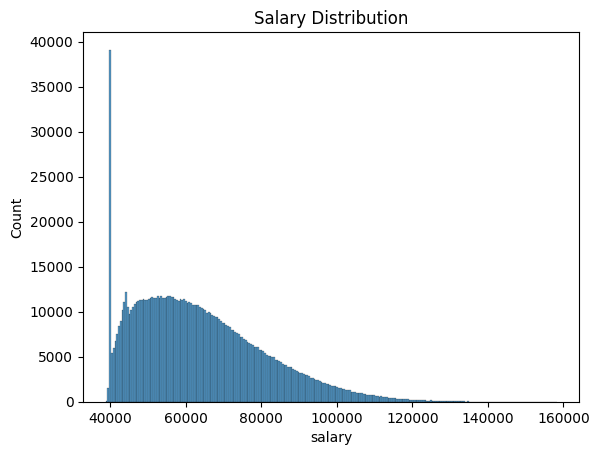

In [33]:
## Plot the salary distribution
sal_df_pandas = sal_df.toPandas()
sns.histplot(sal_df_pandas['salary'])
plt.title('Salary Distribution')
plt.show()


# Practice Activity One: Explore the data

In [35]:
## Create a sum of missing values per column in the employees data
emp_df.select([sum(col(c).isNull().cast('int')).alias(c) for c in emp_df.columns]).show()


+------+----------+----------+---------+------+---------+
|emp_no|birth_date|first_name|last_name|gender|hire_date|
+------+----------+----------+---------+------+---------+
|     0|         0|         0|        0|     0|        0|
+------+----------+----------+---------+------+---------+



In [36]:
## Count the number of rows in the employees data
emp_df.count()


300024

In [ ]:
## How many different first names can be found in the employees data?
emp_df.select(countDistinct('first_name')).show()

#or

emp_df.select('first_name').distinct().count()

+--------------------------+
|count(DISTINCT first_name)|
+--------------------------+
|                      1275|
+--------------------------+



# Task Five: Aggregate and summarize the data
In this task, you will perform data aggregation and summarization using the salaries data.

In [ ]:
## Group the data and calculate the average salary for each department


In [ ]:
## Get the average salary and number of employees in each department


In [ ]:
## Convert Spark data frame  to Pandas for visualization
dept_summary_df = dept_summary.toPandas()

## Plot the data


In [ ]:
## Retrieve a list of employee numbers and the average salary.
## Make sure that you return where the average salary is more than $120,000

## Group by employee number and calculate the average salary


## Order in descending order of average_salary


## Show the result
emp_avg_salary.show()

# Task Six: Join the data sets
In this task, you will join the salaries and employees data using the employees number.

In [ ]:
from pyspark.sql import functions as F

## Create an age column in the employees data
## Age when the employee was hired


In [ ]:
## Join salaries and employees data on 'emp_no'


In [ ]:
## Retrieve a list of employee numbers and the average salary.
## Make sure that you return where the average salary is more than $120,000

## Group by employee number and calculate the average salary


## Join the aggregated result back with the original employee data to get first_name, last_name, hire_date



emp_salary_summary.show()

# Cumulative Activity: Analyze employees' retention

As a junior data analyst at a growing company, you are tasked with analyzing employee retention. Your aim is to find departments with the highest amount of employees that have worked longer than ten years. This will assist HR in enhancing employees' engagement and retention strategies. 

To complete this activity, you will use the employee dataset and create a data frame with the employee totals in each department for a period over 10 years (calculated by from_date and to_date).  Finally, you'll visualize how long-term employees are spread across departments via a bar chart.

In [ ]:
from pyspark.sql import functions as F

## Calculate the years worked based on the difference between 'to_date' and 'from_date'

## Group by emp_no and dept_no to sum the years worked


In [ ]:
## Filter employees who have worked more than 10 years


## Group by department and count distinct employees who worked more than 10 years


## Show the result


In [ ]:
## Convert the Spark data frame to Pandas for visualization


## Create a bar chart to visualize the distribution of long-term employees across departments
